In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:/BaiduNetdiskDownload/ML_NG/01-linear regression/ex1data1.txt",names=["population","profit"])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


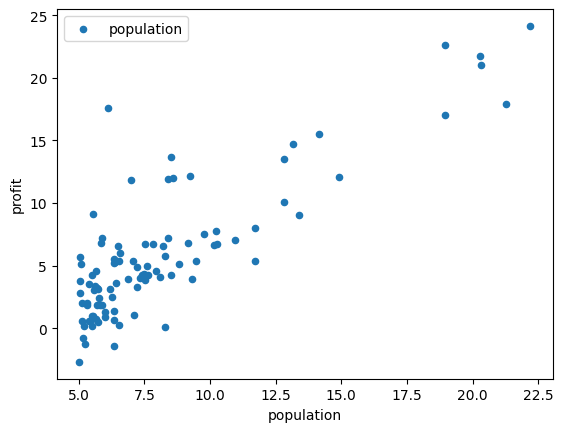

In [6]:
data.plot.scatter("population","profit",label="population")
plt.show()

In [7]:
data.insert(0,"ones",1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
x=data.iloc[:,0:-1]
x.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y=data.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [10]:
x=x.values

In [11]:
x.shape

(97, 2)

In [12]:
y=y.values

In [13]:
y.shape

(97,)

In [14]:
y=y.reshape(97,1)
y.shape

(97, 1)

In [15]:
def costFunction(x,y,theta):
    inner=np.power(x @ theta-y,2)
    return np.sum(inner)/(2*len(x))

In [16]:
theta=np.zeros((2,1))
theta.shape

(2, 1)

In [17]:
cost_init=costFunction(x,y,theta)
print(cost_init)

32.072733877455676


In [18]:
def gradientDescent(x,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        theta=theta-(x.T@(x@theta-y))*alpha/len(x)
        cost=costFunction(x,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
            
    return theta,costs

In [19]:
alpha = 0.02
iters = 2000

theta,costs = gradientDescent(x,y,theta,alpha,iters)

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


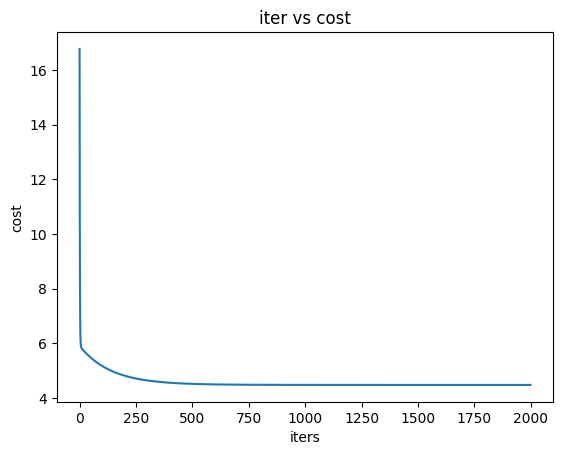

In [21]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel="iters",
      ylabel="cost",
      title="iter vs cost")
plt.show()

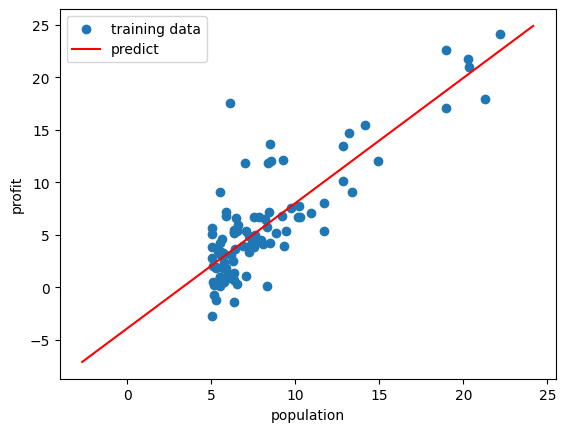

In [25]:
#拟合函数可视化
"""直线中x，y的对应"""
x_line=np.linspace(y.min(),y.max(),100)
y_line=theta[0,0]+theta[1,0]*x_line

"""绘制散点图与直线图"""
fig,ax=plt.subplots()
ax.scatter(x[:,1],y,label="training data")
ax.plot(x_line,y_line,"r",label="predict")
ax.legend()
ax.set(xlabel="population",
      ylabel="profit")
plt.show()